In [31]:
import pandas as pd
import numpy as np

# Simple example for Gantt chart creation

In [32]:
tasks_data = pd.read_csv('tasks_data.csv')

In [33]:
tasks_data

,name,start.date,end.date,is.critical
0,Initial task,2020-01-01,2020-02-15,False
1,Small task,2020-02-17,2020-02-27,True
2,Another task,2020-03-02,2020-04-20,False
3,Parallel task,2020-03-15,2020-04-20,False
4,Little task,2020-04-20,2020-04-25,True
5,Parallel task,2020-04-25,2020-05-25,False
6,Last task,2020-05-25,2020-05-30,True
7,Finish,2020-05-31,2020-06-06,False


# matplotlib example

In [34]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [35]:
months = mdates.MonthLocator()  # every month
date_fmt = mdates.DateFormatter('%Y-%m-%d')

In [36]:
tasks_data_plt = tasks_data.copy()

In [37]:
tasks_data_plt['start.date'] = pd.to_datetime(tasks_data['start.date'])
tasks_data_plt['end.date'] = pd.to_datetime(tasks_data['end.date'])
tasks_data_plt['duration'] = tasks_data_plt['end.date'] - tasks_data_plt['start.date']

In [38]:
np.datetime64(tasks_data_plt['start.date'][0], 'D')

numpy.datetime64('2020-01-01')

In [39]:
tasks = {task : (i+1)*10 for i, task in enumerate( dict.fromkeys(tasks_data['name']) )}
tasks

{'Initial task': 10,
 'Small task': 20,
 'Another task': 30,
 'Parallel task': 40,
 'Little task': 50,
 'Last task': 60,
 'Finish': 70}

In [40]:
start_times = [np.datetime64(t, 'D') for t in tasks_data_plt['start.date'] ]

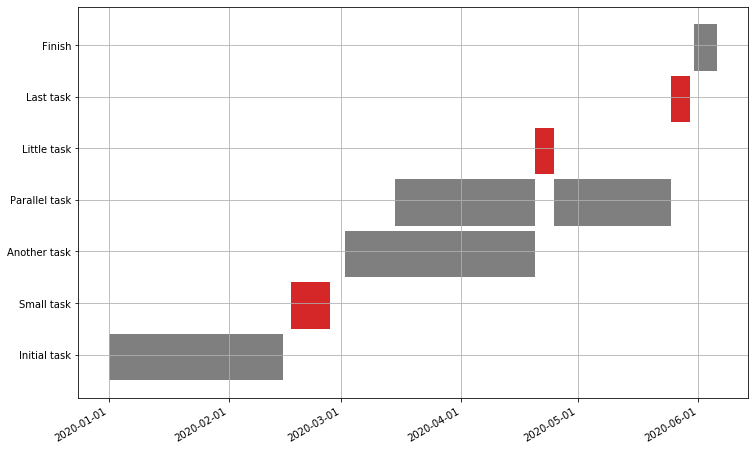

In [43]:
fig, ax_gnt = plt.subplots(figsize = (12, 8))

for i, t in enumerate(tasks_data_plt['name']):
    ax_gnt.broken_barh([(start_times[i], tasks_data_plt['duration'][i])], (tasks[t], 9),
                        facecolors = ('tab:red') if tasks_data_plt['is.critical'][i] else ('tab:grey')) 
  
ax_gnt.grid(True)

ax_gnt.set_yticks([i + 5 for i in tasks.values()]) 
ax_gnt.set_yticklabels(dict.fromkeys(tasks_data['name']).keys()) 
# Format the x-axis
ax_gnt.xaxis_date()
ax_gnt.xaxis.set_major_locator(months)
ax_gnt.xaxis.set_major_formatter(date_fmt)


fig.autofmt_xdate()

plt.show()

# plotly example

In [19]:
import plotly.figure_factory as ff

In [20]:
tasks_data_plotly = tasks_data.copy()

In [21]:
tasks_data_plotly.columns = ['Task', 'Start', 'Finish', 'Resource']

In [22]:
tasks_data_plotly['Resource'] = [ 'Critical' if el else 'Not critical' for el in tasks_data_plotly['Resource']]

In [23]:
tasks_data_plotly

,Task,Start,Finish,Resource
0,Initial task,2020-01-01,2020-02-15,Not critical
1,Small task,2020-02-17,2020-02-27,Critical
2,Another task,2020-03-02,2020-04-20,Not critical
3,Parallel task,2020-03-15,2020-04-20,Not critical
4,Little task,2020-04-20,2020-04-25,Critical
5,Parallel task,2020-04-25,2020-05-25,Not critical
6,Last task,2020-05-25,2020-05-30,Critical
7,Finish,2020-05-31,2020-06-06,Not critical


In [24]:
critical_colors = { 'Critical' : 'rgb(202, 47, 85)', 'Not critical' : 'rgb(107, 127, 135)' }

In [25]:
fig_plotly = ff.create_gantt(tasks_data_plotly, colors=critical_colors, index_col='Resource', title='Gantt Chart',
                             show_colorbar=True, bar_width=0.4, showgrid_x=True, showgrid_y=True)
fig_plotly.show()